# Analysis of the Data

We analyze the given dataset for discrepencies, structures of storing data and the common patterns to decide on the manipulations needed during preprocessing

## Fetching and Reviewing

In [1]:
import numpy as np
import pandas as pd
import soundfile as sf
from tqdm import tqdm
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
!dir

 Volume in drive C is Windows
 Volume Serial Number is 42A6-3FEC

 Directory of C:\Users\jtdut\Documents\Machine Learning works\British bird songs

30-07-2018  00:18    <DIR>          .
30-07-2018  00:18    <DIR>          ..
07-07-2018  11:46    <DIR>          .ipynb_checkpoints
30-07-2018  00:18           150,964 analysis.ipynb
16-11-2017  21:51            40,811 birdsong_metadata.csv
30-07-2018  00:19             5,809 chart of all actions.png
09-07-2018  22:11             8,234 data_preparation.ipynb
20-09-2017  04:26    <DIR>          songs
               4 File(s)        205,818 bytes
               4 Dir(s)  76,556,296,192 bytes free


In [3]:
df = pd.read_csv('birdsong_metadata.csv')

In [4]:
df

,file_id,genus,species,english_cname,who_provided_recording,country,latitude,longitute,type,license
0,132608,Acanthis,flammea,Common Redpoll,Jarek Matusiak,Poland,50.793200,15.499500,"female, male, song",http://creativecommons.org/licenses/by-nc-sa/3.0/
1,132611,Acanthis,flammea,Common Redpoll,Jarek Matusiak,Poland,50.793200,15.499500,"flight call, male, song",http://creativecommons.org/licenses/by-nc-sa/3.0/
2,35068,Acanthis,flammea,Common Redpoll,Sander Bot,Netherlands,52.817600,6.432600,"call, song",http://creativecommons.org/licenses/by-nc-nd/2.5/
3,82715,Acrocephalus,palustris,Marsh Warbler,Dougie Preston,United Kingdom,60.353900,-1.268900,Song,http://creativecommons.org/licenses/by-nc-nd/2.5/
4,64685,Acrocephalus,palustris,Marsh Warbler,Dougie Preston,United Kingdom,60.353900,-1.268900,Song,http://creativecommons.org/licenses/by-nc-nd/2.5/
5,64686,Acrocephalus,palustris,Marsh Warbler,Dougie Preston,United Kingdom,60.353900,-1.268900,Song,http://creativecommons.org/licenses/by-nc-nd/2.5/
6,120664,Acrocephalus,schoenobaenus,Sedge Warbler,david m,United Kingdom,56.586000,-6.185500,"male, song",http://creativecommons.org/licenses/by-nc-nd/3.0/
7,120666,Acrocephalus,schoenobaenus,Sedge Warbler,david m,United Kingdom,56.586000,-6.185500,"male, song",http://creativecommons.org/licenses/by-nc-nd/3.0/
8,76767,Acrocephalus,schoenobaenus,Sedge Warbler,Richard Dunn,United Kingdom,55.280900,-1.580100,song,http://creativecommons.org/licenses/by-nc-nd/2.5/
9,124052,Acrocephalus,scirpaceus,Eurasian Reed Warbler,david m,United Kingdom,51.898500,-0.537200,"call, female, male, song",http://creativecommons.org/licenses/by-nc-nd/3.0/


## Analysis

First we observe from the given information, a single species can have multiple types. So we have multi-class classification problem here. We first convert these types into a numerical value with which we can reference the the signal from a bird. 

#1 We first convert the types of the signals into a single list of types. We use their indices to reference a label from now on.
#2 Next we sample the signal and analyze their patterns (we analyze patterns of 5 signals)
#3 We put these 2 informations together and see if there is a possibility of converting the signals to their frequency domains to speed u computation. 

In [5]:
def analyze_types():
    list_of_types = list(df.type)
    words_in_types = get_words_in_types(list_of_types)
    frequency_of_each_word = [0 for x in range(len(words_in_types))]
    #Actual calculation of frequency
    for x in list_of_types:
        #print(x)
        sublist = x.split(',')
        for i in sublist:
            i = i.lower()
            #print(i)
            if(i in words_in_types):
                pos = words_in_types.index(i)
                #print(str(pos)+" for word " + words_in_types[pos])
                frequency = frequency_of_each_word[pos]
                frequency_of_each_word[words_in_types.index(i)] = frequency + 1
    return (words_in_types, frequency_of_each_word)

def get_words_in_types(list_of_types):
    l = []
    for x in list_of_types:
        words = x.split(',')
        for i in words:
            i = i.lower().strip()
            if(not (i in l)):
                l.append(i)
    #print(words)
    return l

In [6]:
x, y = analyze_types()

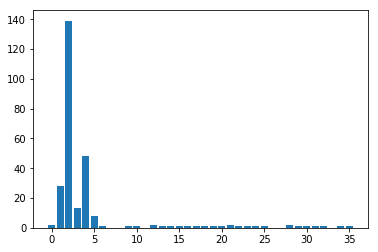

In [7]:
plt.bar(range(0, len(x)), y)
plt.savefig("chart of all actions")

In [8]:
x[0:6]

['female', 'male', 'song', 'flight call', 'call', 'alarm call']

We see that "song" is the most common type of signals a bird commits to. Second most common trend is the call signal. The first 5 signals mostly make up the commonly found labels in a bird. We can commit our algorithm to find these parameters first rather than the other 31 types.

Next we analyze 5 signals to check their patterns. Let's select the samples in positions 1, 3, 6, 9, and 12.

In [9]:
pre_marker = 'xc'

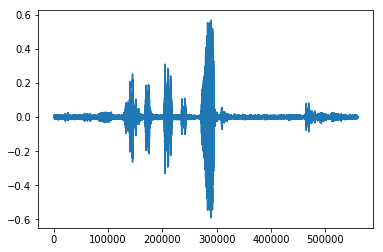

In [10]:
bird1_signal, bird1_bitrate = sf.read('songs/' + pre_marker + str(df.file_id[1]) + '.flac')

plt.plot([x for x in range(bird1_signal.size)], bird1_signal)

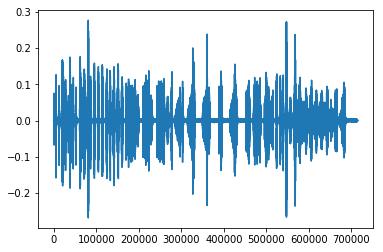

In [11]:
bird2_signal, bird2_bitrate = sf.read('songs/' + pre_marker + str(df.file_id[3]) + '.flac')

plt.plot([x for x in range(bird2_signal.size)], bird2_signal)

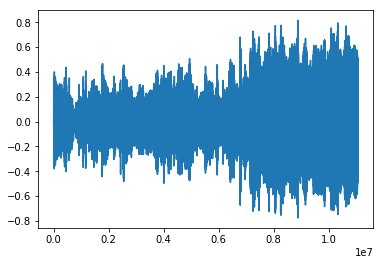

In [12]:
bird3_signal, bird3_bitrate = sf.read('songs/' + pre_marker + str(df.file_id[6]) + '.flac')

plt.plot([x for x in range(bird3_signal.size)], bird3_signal)

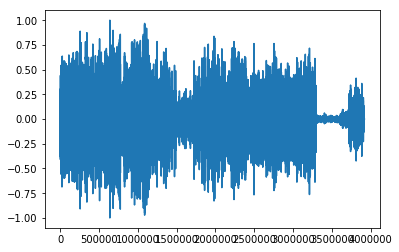

In [13]:
bird4_signal, bird41_bitrate = sf.read('songs/' + pre_marker + str(df.file_id[9]) + '.flac')

plt.plot([x for x in range(bird4_signal.size)], bird4_signal)

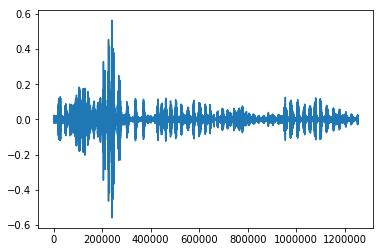

In [14]:
bird5_signal, bird5_bitrate = sf.read('songs/' + pre_marker + str(df.file_id[12]) + '.flac')

plt.plot([x for x in range(bird5_signal.size)], bird5_signal)

## Conclusion

The above samples gives us a view into the signals. We see their variations clearly, not only just by the data distribution, but also by the varied length of the samples. Clearly preprocessing will be hectic with traditional machine learning models.

We need to use modern Deep Learning approaches. Normally people will consider LSTMs, but rather we should go with GRUs keeping in mind, this research will ultimately lead to a mobile computing application. 

We proceed without changing the form of the data. FFT is off the table.